In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


## Our source for drawing the UK constituencies has lots of different formats (look at the options under 'Download'. The geojson has ONLY geographic data and nothing else. The CSV has no geographic data...


> https://geoportal.statistics.gov.uk/datasets/westminster-parliamentary-constituencies-december-2017-generalised-clipped-boundaries-in-the-uk/data

## Try a shapefile folder downloaded from same place

In [ ]:
# import the shape folder of files

files = "/content/drive/My Drive/JOMEC/FILES_FOR_CLASSES_2020/MSc/uk_parl_2017.shp"

df = gpd.read_file(files)

In [ ]:
# what are we looking at in our 'shapefile' folder?

df[:3]

,objectid,pcon17cd,pcon17nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E14000530,Aldershot,484884,155126,-0.7841,51.289001,5.300200e+07,40826.569141,"POLYGON ((485406.902 159918.603, 485465.904 15..."
1,2,E14000531,Aldridge-Brownhills,404723,302568,-1.9316,52.620899,4.403349e+07,38222.291898,"POLYGON ((400715.498 304323.098, 400862.202 30..."
2,3,E14000532,Altrincham and Sale West,374132,389051,-2.3904,53.397701,5.092603e+07,46097.782457,"POLYGON ((369941.302 390805.702, 369994.598 39..."


In [ ]:
# filter for Wales by selecting constituencies beginning 'W'

dfw = df[df.pcon17cd.str.startswith('W')]

In [ ]:
# look at the first three rows

dfw[:3]

,objectid,pcon17cd,pcon17nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
610,611,W07000041,Ynys Mon,245222,378346,-4.3229,53.279400,7.145028e+08,331721.133987,"MULTIPOLYGON (((239006.203 395294.397, 239118...."
611,612,W07000042,Delyn,318273,370838,-3.2257,53.228298,2.826087e+08,137330.590366,"MULTIPOLYGON (((326087.397 372411.298, 325926...."
612,613,W07000043,Alyn and Deeside,330102,362484,-3.0467,53.154900,1.549167e+08,123402.549164,"MULTIPOLYGON (((327615.504 371693.203, 327729...."


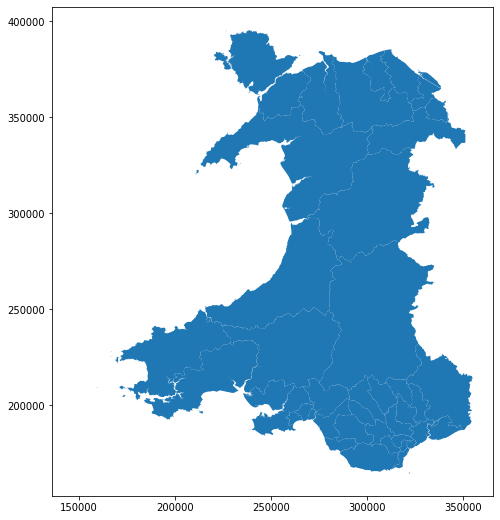

In [ ]:
# call a .plot() method on our df to 'graph' it

dfw.plot(figsize = (15, 9))

## Download data on Senedd turnout 2016 as a csv 

source: https://www.electoralcommission.org.uk/who-we-are-and-what-we-do/elections-and-referendums/past-elections-and-referendums/senedd-elections/results-and-turnout-2016-national-assembly-wales-election


In [ ]:
# import our data, having downloaded it

file = "/content/drive/My Drive/JOMEC/FILES_FOR_CLASSES_2020/MSc/2016_senedd_turnout.csv"

df = pd.read_csv(file)

In [ ]:
df[:4]

,ONS Constituency Code,Constituency,Total vote turnout (incl. postal votes rejected and votes rejected at count) (%)
0,W07000049,Aberavon,43.26
1,W07000058,Aberconwy,49.90
2,W07000043,Alyn & Deeside,35.35
3,W07000057,Arfon,51.97


In [ ]:
# rename the column 'ONS Constituency' that will need to be named the same way in both dfs. Rename the other two while we're at it

df.columns = ['pcon17cd', 'constituency', 'voter_turnout']


In [ ]:
# merge the two dfs into a new, bigger df, called 'total'

total = pd.merge(dfw, df, on = 'pcon17cd')

In [ ]:
# what does the new df look like?

total[:4]

,objectid,pcon17cd,pcon17nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,constituency,voter_turnout
0,611,W07000041,Ynys Mon,245222,378346,-4.3229,53.279400,7.145028e+08,331721.133987,"MULTIPOLYGON (((239006.203 395294.397, 239118....",Ynys Mon,51.26
1,612,W07000042,Delyn,318273,370838,-3.2257,53.228298,2.826087e+08,137330.590366,"MULTIPOLYGON (((326087.397 372411.298, 325926....",Delyn,44.07
2,613,W07000043,Alyn and Deeside,330102,362484,-3.0467,53.154900,1.549167e+08,123402.549164,"MULTIPOLYGON (((327615.504 371693.203, 327729....",Alyn & Deeside,35.35
3,614,W07000044,Wrexham,336339,353957,-2.9517,53.078999,1.031530e+08,68498.080128,"POLYGON ((340694.801 356745.502, 340482.103 35...",Wrexham,40.19


In [ ]:
# how low / high was turnout in 2016?

print(total.voter_turnout.min())
print(total.voter_turnout.max())

35.35
57.23


In [ ]:
# check data type of the turnout column....

total.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   objectid       40 non-null     int64   
 1   pcon17cd       40 non-null     object  
 2   pcon17nm       40 non-null     object  
 3   bng_e          40 non-null     int64   
 4   bng_n          40 non-null     int64   
 5   long           40 non-null     float64 
 6   lat            40 non-null     float64 
 7   st_areasha     40 non-null     float64 
 8   st_lengths     40 non-null     float64 
 9   geometry       40 non-null     geometry
 10  constituency   40 non-null     object  
 11  voter_turnout  40 non-null     float64 
dtypes: float64(5), geometry(1), int64(3), object(3)
memory usage: 4.1+ KB


In [ ]:
# if turnout is not a float, change its type

# total.voter_turnout = total.voter_turnout.astype(float)

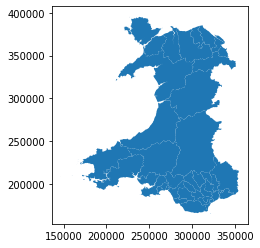

In [ ]:
# because total still has 'geometry' data it can still be graphed immediately

total.plot()

## Build the map (assigning a value to each geographic area - the turnout)

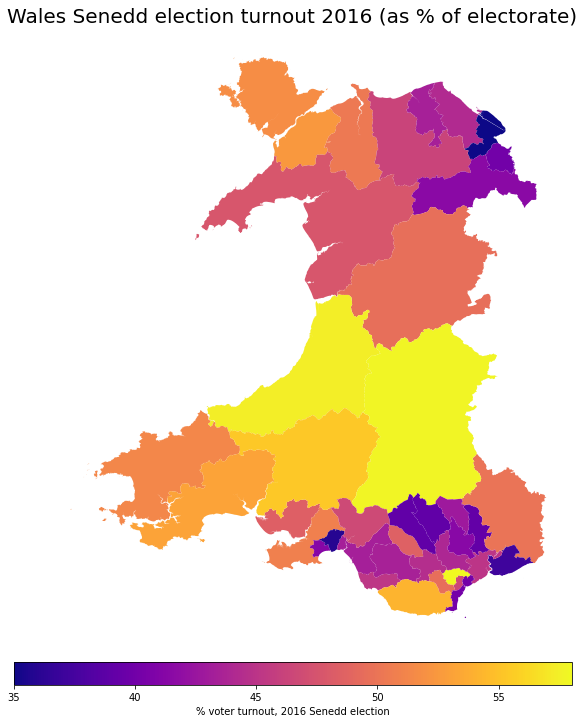

In [ ]:
# build a base for the map, define how big it will appear
fig, ax = plt.subplots(1, figsize=(10, 15))

# define a title for our map
plt.title("Wales Senedd election turnout 2016 (as % of electorate)", fontdict = {'fontsize' : 20})

# we don't want to see 'eastings' and 'northings' on the x and y axis, thank you - even if they are included in our dataframe
ax.axis("off")

# define the colors - using 'plasma' as the color scheme, and the minimun and maximum values
sm = plt.cm.ScalarMappable(cmap="plasma", norm=plt.Normalize(vmin=35, vmax=58))

# define our map from the big df, giving the column we're interested in as the argument, and specifying the colormap
our_map = total.plot(column="voter_turnout", cmap="plasma", linewidth=.8, ax=ax)

# show the map
our_map

# draw the colorbar with arguments on: shrinking its width compared to map, thickness, horizontal or vertical, label, how much / little padding (distance)
# it has relative to the map
cbar = fig.colorbar(sm, shrink=1, aspect=25, orientation='horizontal', label = '% voter turnout, 2016 Senedd election', pad = 0.02)


In [ ]:
# export locally

our_map.savefig('books_read.png')

# this gets saved at the route of this notebook's file structure (see left-hand column). You can download it locally.


AttributeError: ignored